In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.integrate import trapezoid
from scipy.special import kv
'''
Here we will define the basin of attraction necessary for computing
the effective CAFI density for corals of various sizes. 
'''
#warnings.filterwarnings("ignore")
#Coral radius data
dr = 0.1
rm = 0.1
rM = 500

rData=np.around(np.arange(rm, rM+dr, dr), decimals=2)
nr = len(rData)

#We establish values away from the coral edge, must make this long enough
x0M = 3000
dx0 = dr
x0Data = np.arange(rm, x0M+dr, dx0)

#Parameters associated to the chemical PDE
m = 1 #site specific chemical emission rate
D = 1 #chemical diffusion rate
rho = 1e-4 #chemical degredation rate
thresh = 0.01 #chemical threshold that is observed by CAFI


for r in rData:
    if r == rm:
        x0vals = np.arange(r+rm, x0M+dx0, dx0)
    elif r > rm:
        x0vals = np.arange(rStarPrev+rm, x0M+dx0, dx0)

    for x0 in x0vals:
        rVals = np.arange(x0 - r, x0 + r + dr, dr)
        xTilde = (x0**2 + r**2 - np.square(rVals))/(2*x0)
        ah = ( x0 - xTilde[1:-1] ) / rVals[1:-1]
        ah = np.insert(ah, 0, 1)
        ah = np.append(ah, 1)
        ah = np.clip(ah, -1, 1)
        theta = np.arccos(ah)
        K = kv(0, np.sqrt(rho/D) * rVals)
        f = rVals * theta * K
        c = (m / (np.pi * D)) * trapezoid(f,rVals)
        if c < thresh:
            rStarPrev = x0
            if r == rm:
                rStar = rStarPrev
                delta = rStarPrev - r
            else:
                rStar = np.append(rStar , rStarPrev)
                delta = np.append(delta, rStarPrev - r)

            break

print('Done!')   

Done!


Text(0.5, 1.0, 'Basin of attraction')

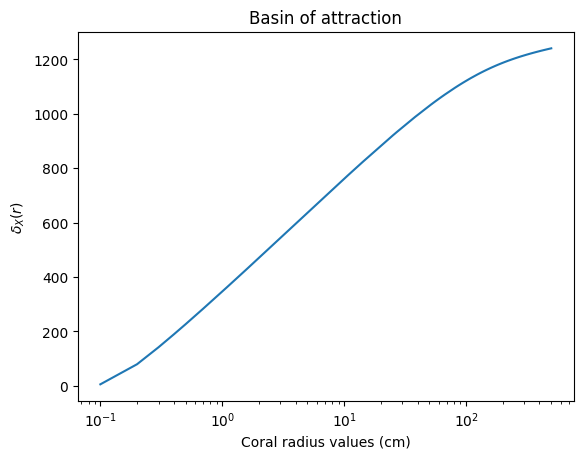

In [2]:
plt.figure()
plt.semilogx(rData, delta)
plt.xlabel('Coral radius values (cm)')
plt.ylabel(r'$\delta_X(r)$')
plt.title('Basin of attraction')

Text(0.5, 1.0, 'Basin of attraction')

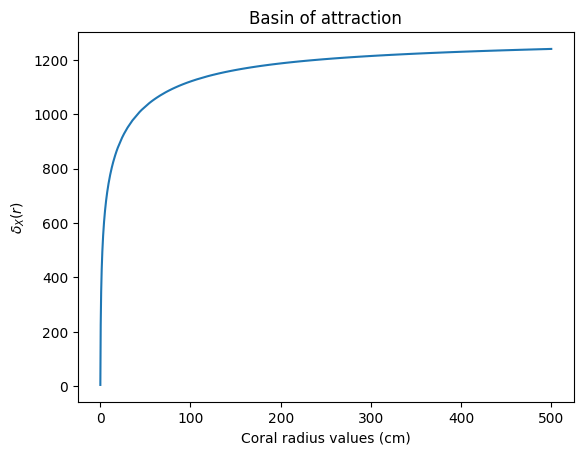

In [3]:
plt.figure()
plt.plot(rData,delta)
plt.xlabel('Coral radius values (cm)')
plt.ylabel(r'$\delta_X(r)$')
plt.title('Basin of attraction')

Text(0.5, 1.0, 'Radius of detection')

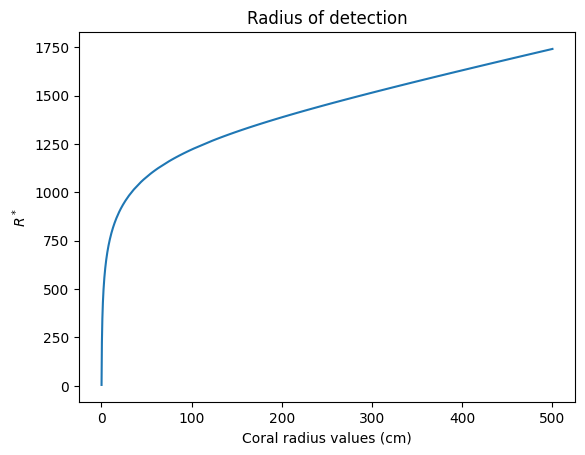

In [4]:
plt.figure()
plt.plot(rData,rStar)
plt.xlabel('Coral radius values (cm)')
plt.ylabel(r'$R^*$')
plt.title('Radius of detection')

In [7]:
%store delta
%store rData

Stored 'delta' (ndarray)
Stored 'rData' (ndarray)
